In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Leads X Education.csv')



Check for missing values


In [2]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper A

Handle missing values
Example: Replace missing numerical values with mean, and categorical values with mode



In [3]:
df.fillna({'TotalVisits': df['TotalVisits'].mean()}, inplace=True)
df.fillna({'Specialization': df['Specialization'].mode()[0]}, inplace=True)

1. Conversion Rate by Lead Origin


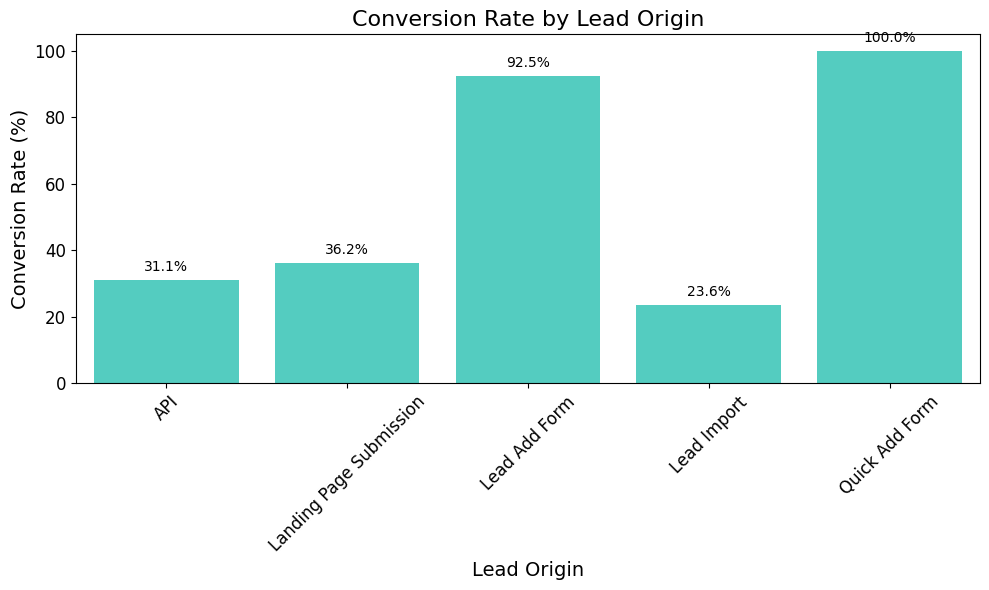

In [4]:
# Conversion rate by Lead Origin
conversion_rate_by_origin = df.groupby('Lead Origin')['Converted'].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=conversion_rate_by_origin.index, y=conversion_rate_by_origin.values, color='turquoise')
plt.title('Conversion Rate by Lead Origin', fontsize=16)
plt.ylabel('Conversion Rate (%)', fontsize=14)
plt.xlabel('Lead Origin', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with the percentage values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points', fontsize=10)
plt.tight_layout()
plt.show()

2. Average Total Visits by Lead Source
Improved with horizontal bars for better readability and distinct colors.

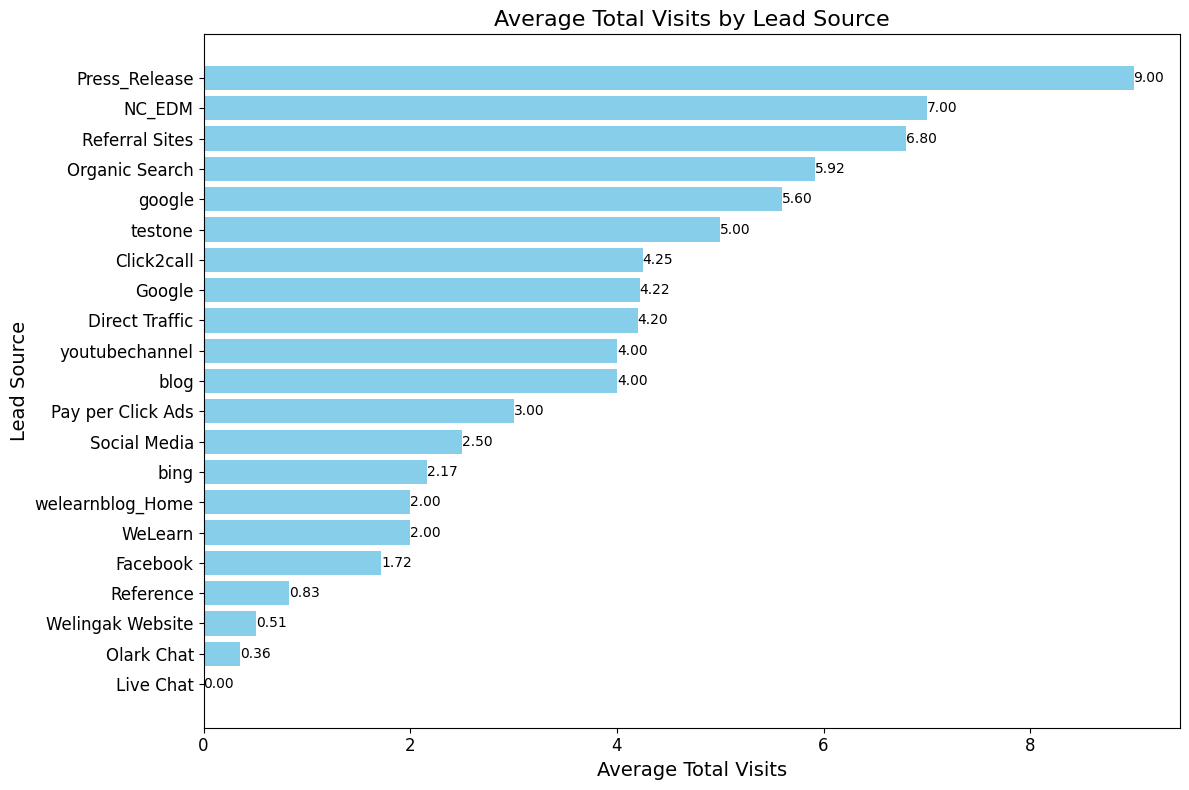

In [5]:
# Average Total Visits by Lead Source
avg_visits_by_source = df.groupby('Lead Source')['TotalVisits'].mean()

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(avg_visits_by_source.sort_values().index, avg_visits_by_source.sort_values().values, color='skyblue')
plt.title('Average Total Visits by Lead Source', fontsize=16)
plt.xlabel('Average Total Visits', fontsize=14)
plt.ylabel('Lead Source', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with the exact values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             '{0:.2f}'.format(bar.get_width()),
             va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

3. Total Time Spent on Website by Occupation


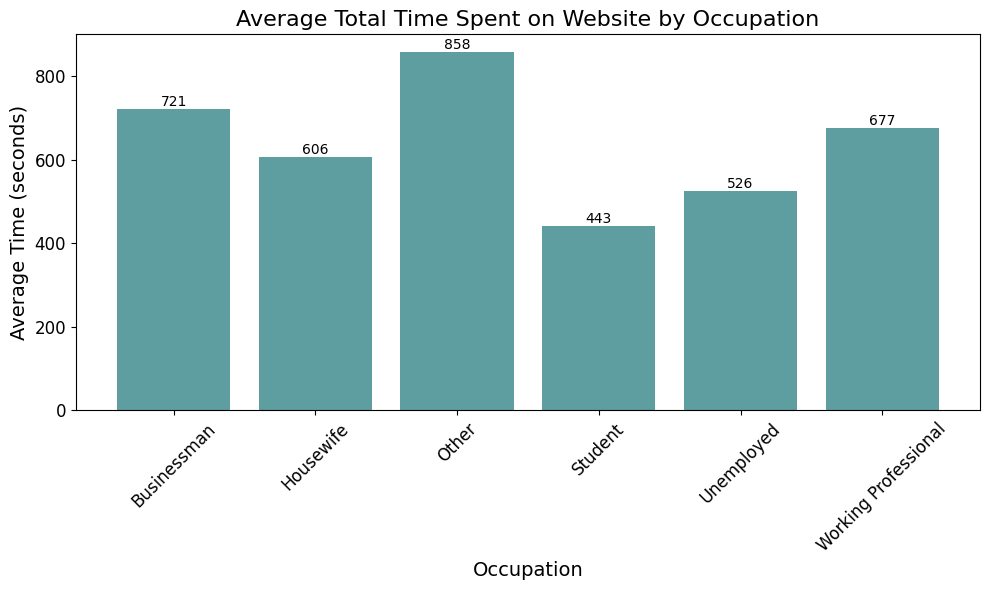

In [6]:
# Average Time on Website by Occupation
avg_time_by_occupation = df.groupby('What is your current occupation')['Total Time Spent on Website'].mean()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_time_by_occupation.index, avg_time_by_occupation.values, color='cadetblue')
plt.title('Average Total Time Spent on Website by Occupation', fontsize=16)
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with the exact values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             '{0:.0f}'.format(bar.get_height()), 
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

4. Page Views Per Visit Distribution

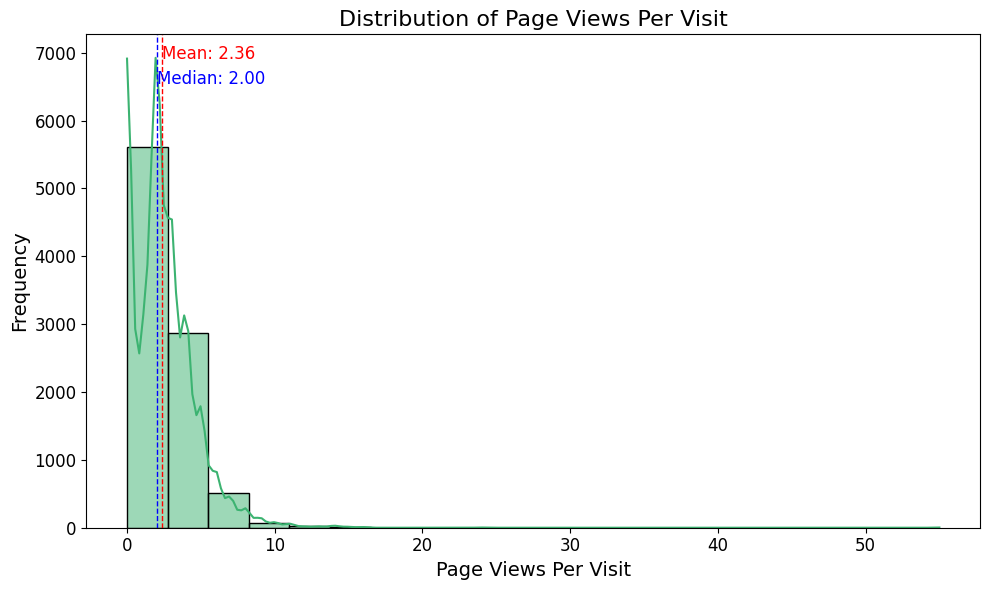

In [7]:
# Distribution of Page Views Per Visit
plt.figure(figsize=(10, 6))
sns.histplot(df['Page Views Per Visit'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Page Views Per Visit', fontsize=16)
plt.xlabel('Page Views Per Visit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mean and Median lines
mean_val = df['Page Views Per Visit'].mean()
median_val = df['Page Views Per Visit'].median()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1)

# Annotate mean and median
plt.text(mean_val, plt.ylim()[1]*0.95, 'Mean: {:.2f}'.format(mean_val), color='red', fontsize=12)
plt.text(median_val, plt.ylim()[1]*0.90, 'Median: {:.2f}'.format(median_val), color='blue', fontsize=12)
plt.tight_layout()
plt.show()

5. Lead Quality Count


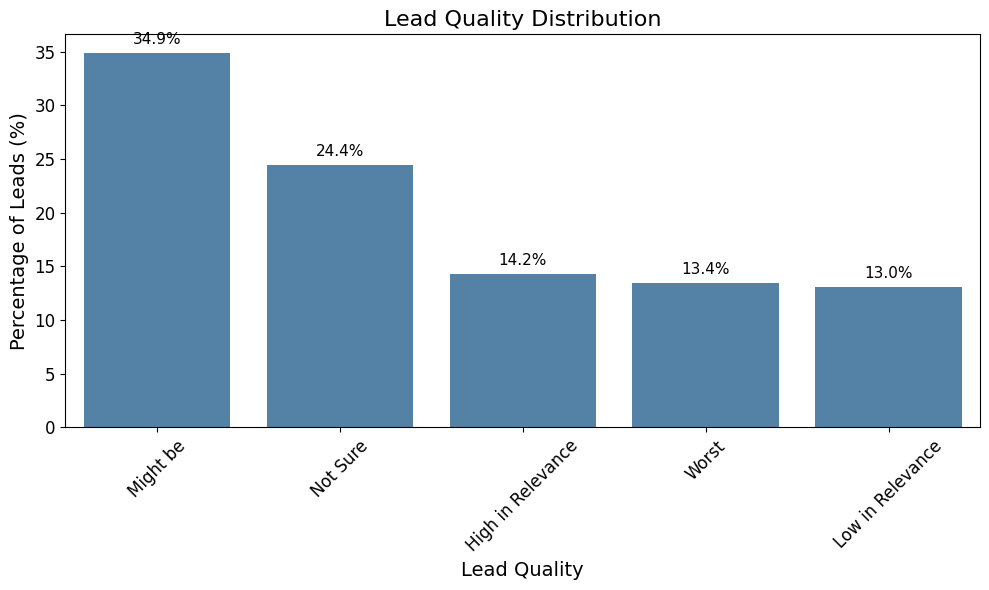

In [8]:
# Count of Lead Quality
lead_quality_counts = df['Lead Quality'].value_counts()
total_leads = df['Lead Quality'].notnull().sum()

# Calculating the percentage
lead_quality_percentage = (lead_quality_counts / total_leads) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=lead_quality_percentage.index, y=lead_quality_percentage.values, color='steelblue')
plt.title('Lead Quality Distribution', fontsize=16)
plt.ylabel('Percentage of Leads (%)', fontsize=14)
plt.xlabel('Lead Quality', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with the percentage values
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.1f') + '%', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points', fontsize=11, color='black')
plt.tight_layout()
plt.show()

6. Conversion Rate by Specialization

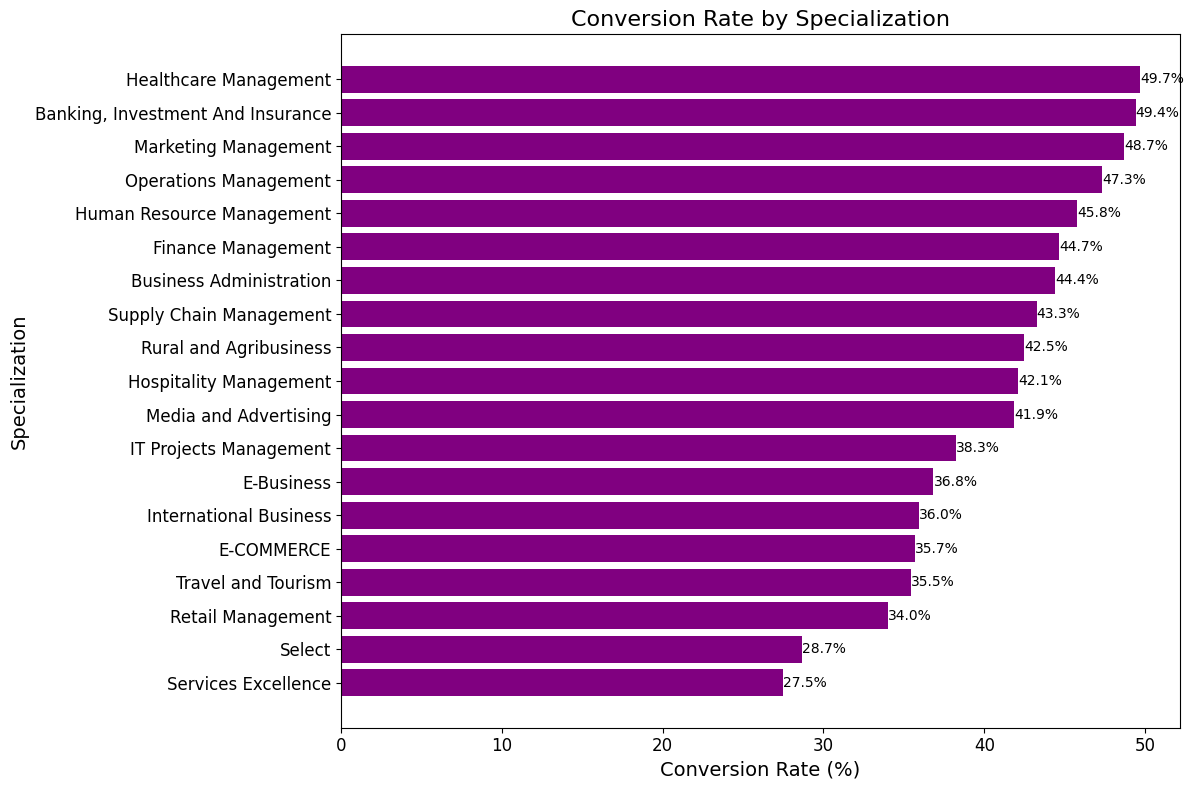

In [9]:
# Conversion Rate by Specialization
conversion_rate_by_specialization = df.groupby('Specialization')['Converted'].mean() * 100

# Sorting data to make the plot more informative
sorted_specialization = conversion_rate_by_specialization.sort_values()

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_specialization.index, sorted_specialization.values, color='purple')
plt.title('Conversion Rate by Specialization', fontsize=16)
plt.xlabel('Conversion Rate (%)', fontsize=14)
plt.ylabel('Specialization', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with the percentage values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             '{0:.1f}%'.format(bar.get_width()), 
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

7. Lead Quality and Profile Score Relationship

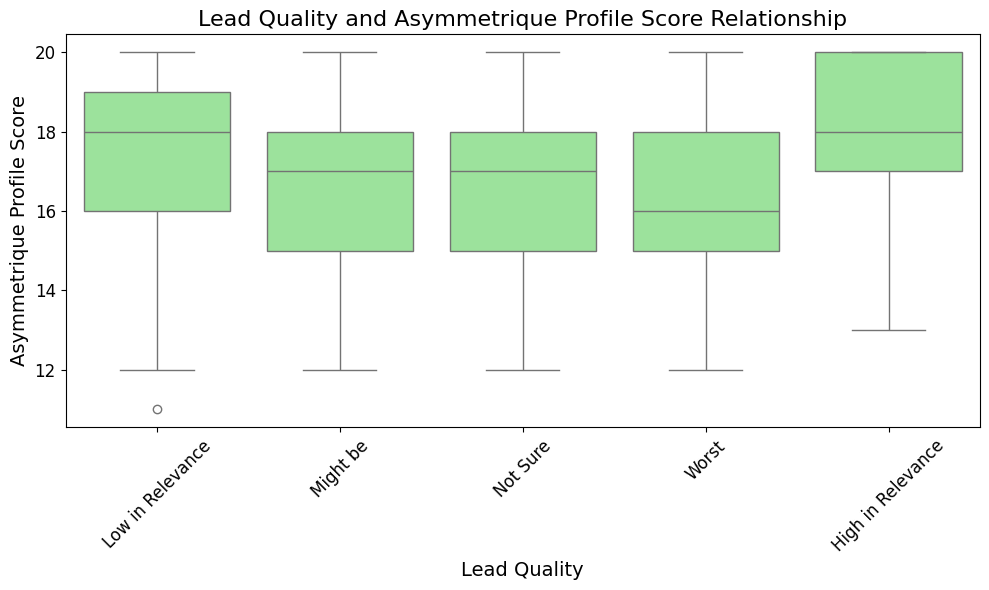

In [10]:
# Check if 'Asymmetrique Profile Score' has non-numeric data and drop those for plotting
df['Asymmetrique Profile Score'] = pd.to_numeric(df['Asymmetrique Profile Score'], errors='coerce')

# Now plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lead Quality', y='Asymmetrique Profile Score', data=df, color='lightgreen')
plt.title('Lead Quality and Asymmetrique Profile Score Relationship', fontsize=16)
plt.xlabel('Lead Quality', fontsize=14)
plt.ylabel('Asymmetrique Profile Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()